### Name: Aaron Eisenberg 

### Course: 2021SU_MSDS_432-DL_SEC55

### Programming Assignment 3

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time 
import os 
from random import random 
from random import seed 

### Step 1 - Setup of Random Arrays and Random Seed 

In [2]:
np.random.seed(15)
rand_array = np.random.randint(100, 1001, 10)  # single array with ten integers from 100 to 1,000 
rand_array = sorted(rand_array)
print(rand_array)

[185, 256, 299, 484, 556, 745, 767, 815, 857, 987]


### Step 2 - Factorial Function without Recursion 

In [3]:
def fact_iterative(n):
    output_value = 1 
    for i in range(1, n+1): 
        output_value = output_value * i 
    return output_value 

# the lists below will allow us to store and display the factorial values for each random integer generated 
factorial_list = [fact_iterative(i) for i in rand_array]
factorial_list_str1 = [len(str(i)) for i in factorial_list]
factorial_list_str2 = [str(i)[0:1] + '.' + str(i)[1:2] + 'e+' + 
                       str(j-1) for i,j in zip(factorial_list, factorial_list_str1)]

For a value of n, the function above defines a starting value of 1, then for each value up to "n" the function  defines the "output_value" to be the current value multiplied by "i" so that it continuously updates. 

In [4]:
def timer1(x):
    start_time = time.perf_counter()
    fact_iterative(x)
    end_time = time.perf_counter()
    run_time = round((end_time - start_time)*1000, 4)
    return run_time 

run_times_iter = []
for i in rand_array:
    a = timer1(i)
    run_times_iter.append(a)

### Step 3 - Factorial Function with Recursion 

In [5]:
def fact_recurs1(n):
    if n == 1:
        return 1
    else:
        return n * fact_recurs1(n-1)

In [6]:
def timer2(x):
    start_time = time.perf_counter()
    fact_recurs1(x)
    end_time = time.perf_counter()
    run_time = round((end_time - start_time)*1000, 4)
    return run_time

run_times_recurs = []
for i in rand_array:
    b = timer2(i)
    run_times_recurs.append(b)

<ipython-input-5-3b906cf64de9>:5: RuntimeWarning: overflow encountered in long_scalars
  return n * fact_recurs1(n-1)


### Step 4 - Table and Visualization of Results 

In [7]:
df1 = pd.DataFrame({'Random Integer': rand_array, 'Factorial': factorial_list_str2, 
                    'Factorial Run Time Using Iteration': run_times_iter, 
                    'Factorial Run Time Using Recursion': run_times_recurs}) 
df1['Difference in Run'] = df1['Factorial Run Time Using Recursion'] - df1['Factorial Run Time Using Iteration']

In [8]:
df1

,Random Integer,Factorial,Factorial Run Time Using Iteration,Factorial Run Time Using Recursion,Difference in Run
0,185,4.1e+340,0.0265,0.5285,0.5020
1,256,8.5e+506,0.0387,0.2606,0.2219
2,299,1.0e+612,0.0354,0.2917,0.2563
3,484,1.0e+1091,0.0732,0.5011,0.4279
4,556,3.6e+1286,0.1020,0.5675,0.4655
5,745,1.1e+1818,0.1849,0.7165,0.5316
6,767,2.3e+1881,0.1928,0.6988,0.5060
7,815,3.1e+2020,0.2163,0.6399,0.4236
8,857,1.7e+2143,0.2375,0.6019,0.3644
9,987,4.3e+2528,0.3032,0.9118,0.6086


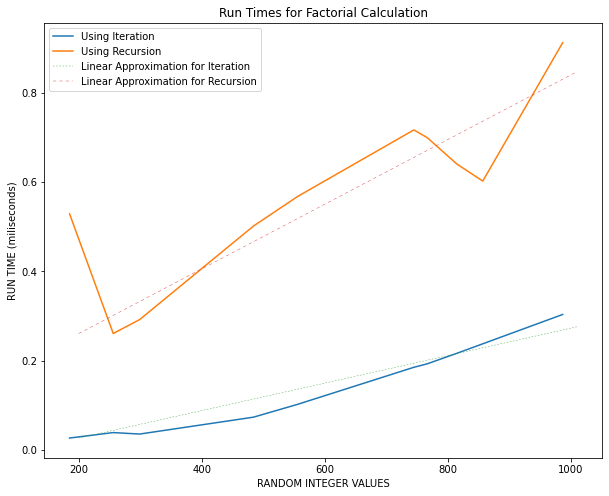

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df1['Random Integer'], df1['Factorial Run Time Using Iteration'], label='Using Iteration')
ax.plot(df1['Random Integer'], df1['Factorial Run Time Using Recursion'], label='Using Recursion')
# ax.plot(df1['Random Integer'], df1['Difference in Run Time'], label='Difference')

ax.set_xlabel('RANDOM INTEGER VALUES')
ax.set_ylabel('RUN TIME (miliseconds)')

min_iter = min(df1['Factorial Run Time Using Iteration'])
diff_iter = (max(df1['Factorial Run Time Using Iteration']) - min_iter) / (len(rand_array))
linear_iter = [min_iter + diff_iter*i for i in range(0, len(df1['Factorial Run Time Using Iteration']))] 
ax.plot(np.arange(200, 1090, 90), linear_iter, lw=0.4, dashes=[4,4], label='Linear Approximation for Iteration')

min_recur = min(df1['Factorial Run Time Using Recursion'])
diff_recur = (max(df1['Factorial Run Time Using Recursion']) - min_recur) / (len(rand_array))
linear_recur = [min_recur + diff_recur*i for i in range(0, len(df1['Factorial Run Time Using Recursion']))] 
ax.plot(np.arange(200, 1090, 90), linear_recur, lw=0.4, dashes=[8,8], label='Linear Approximation for Recursion')

plt.legend()
plt.title('Run Times for Factorial Calculation')
plt.show();

### Step 5 - Amplification of recursive factorial function (using explicit memoization)

In [30]:
factorial_cache = {}                         # set up empty dictionary to load key-values 
def fact_recurs2(n):                         # define function 
    if n in factorial_cache:                 # check if value "n" is in the cache dictionary and if it is then:
        return factorial_cache[n]            # call the corresponding value, which is the factorial in this case 
    if n == 1:                               # to calculate factorial values we use same function as before
        fact_val = 1 
    else:
        fact_val = n * fact_recurs2(n-1)     # here the function is able to use the values in the dictionary 
    factorial_cache[n] = fact_val            # in this step we load the dictionary with the factorial values as
    return fact_val                                 # they are calculated 

In [40]:
a = fact_recurs2(5000)
b = len(str(a)) - 1 
print('Factorial of 5,000:', str(a)[0:1] + '.'  + str(a)[1:2] + 'e+' + str(b))

Factorial of 5,000: 4.2e+16325


The function above allows us to calculate the factorial of larger values than the initial factorial function that uses recursion.   Rather than recalculate all of the factorial values each time, the function calls the appropriate value from the dictionary each time a number "n" is run through it.   In the "Resources" section below I have left links to a couple of videos that were helpful in understanding this topic and coding it properly.  

Below is an example of a value that can be calculated with the latter recursive factorial function but not the initial one.  The code below is set up to print out a message only if the function is unable to run.  

In [58]:
try:
    fact_recurs1(5000)
except:
    print('Maximum recursion limit reached for this value using the initial function')

try:
    fact_recurs2(5000)
except:
    print('Maximum recursion limit reached for this value using the second function')

Maximum recursion limit reached for this value using the initial function


### Step 6 - Iteration Process for Opening File Folders

In [43]:
os.getcwd()

In [30]:
os.chdir('/Users/aaron/main_documents_folder')

In [44]:
for i in os.listdir():
    if os.path.isfile(i):
        print(i)
    else:
        folder_list = []
        
        # logic: 
        # if it is a folder then open it up 
        # base condition is "no folders found"

### Summary 

The recursive method of calculating the factorial value is much slower because we have to run through the entire function repeatedly until the value in the function is reduced to 1.  We can see that for all run times the recursive method took considerably longer.  Both the iterative and the recursive methods appear to have an approximately linear increase in run time as we increase the value for which we are calculating the factorial.  Both of them appear to have a Big O notation of O(n) since they are linear.  The recursive method shows a larger slope when viewing the dashed lines, which attempt to approximate the trend for each method.  

These methods are important for data engineering because calculations and searches often rely on one of the two methods.  I find recursion easier to read and understand but it is much slower to run when scaled to large values.

### Resources:

Youtube Channels with videos on Memoization (used in Step 5 above):
1. Corey Schafer 
2. Socratica 